In [3]:
%pip install pandas



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install matplotlib
%pip install numpy
%pip install seaborn
%pip install scikit-learn
%pip install imbalanced-learn
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from xgboost import Booster
from xgboost import DMatrix
from sklearn import metrics
from datetime import datetime

In [6]:
dataDF = pd.read_csv(r"C:\Users\pooja\OneDrive\Desktop\ofds_cy\creditcard.csv")
dataDF.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<Axes: title={'center': 'Class distribution of the target variable'}, xlabel='Class'>

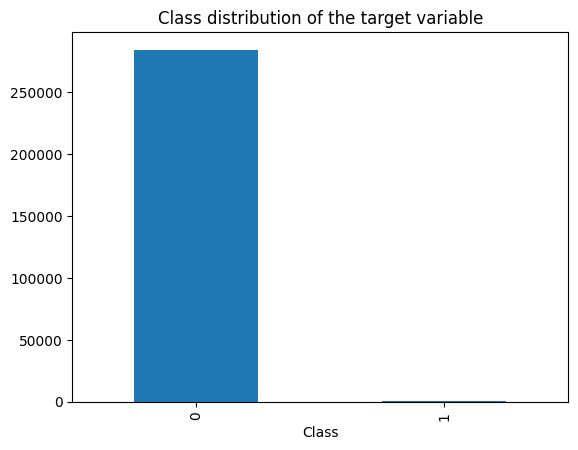

In [7]:
#checking if the dataset is highly imbalanced which means most of the transactions would be legitimate
value_counts = dataDF["Class"].value_counts()
value_counts.plot(kind="bar", title="Class distribution of the target variable")

In [8]:
# basic descriptive statistics for all attributes.
pd.set_option("display.float_format", lambda x: "%.3f" % x)
dataDF.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,...,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000
mean,94813.860,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,...,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,88.350,0.002
std,47488.146,1.959,1.651,1.516,1.416,1.380,1.332,1.237,1.194,1.099,...,0.735,0.726,0.624,0.606,0.521,0.482,0.404,0.330,250.120,0.042
min,0.000,-56.408,-72.716,-48.326,-5.683,-113.743,-26.161,-43.557,-73.217,-13.434,...,-34.830,-10.933,-44.808,-2.837,-10.295,-2.605,-22.566,-15.430,0.000,0.000
25%,54201.500,-0.920,-0.599,-0.890,-0.849,-0.692,-0.768,-0.554,-0.209,-0.643,...,-0.228,-0.542,-0.162,-0.355,-0.317,-0.327,-0.071,-0.053,5.600,0.000
50%,84692.000,0.018,0.065,0.180,-0.020,-0.054,-0.274,0.040,0.022,-0.051,...,-0.029,0.007,-0.011,0.041,0.017,-0.052,0.001,0.011,22.000,0.000
75%,139320.500,1.316,0.804,1.027,0.743,0.612,0.399,0.570,0.327,0.597,...,0.186,0.529,0.148,0.440,0.351,0.241,0.091,0.078,77.165,0.000
max,172792.000,2.455,22.058,9.383,16.875,34.802,73.302,120.589,20.007,15.595,...,27.203,10.503,22.528,4.585,7.520,3.517,31.612,33.848,25691.160,1.000


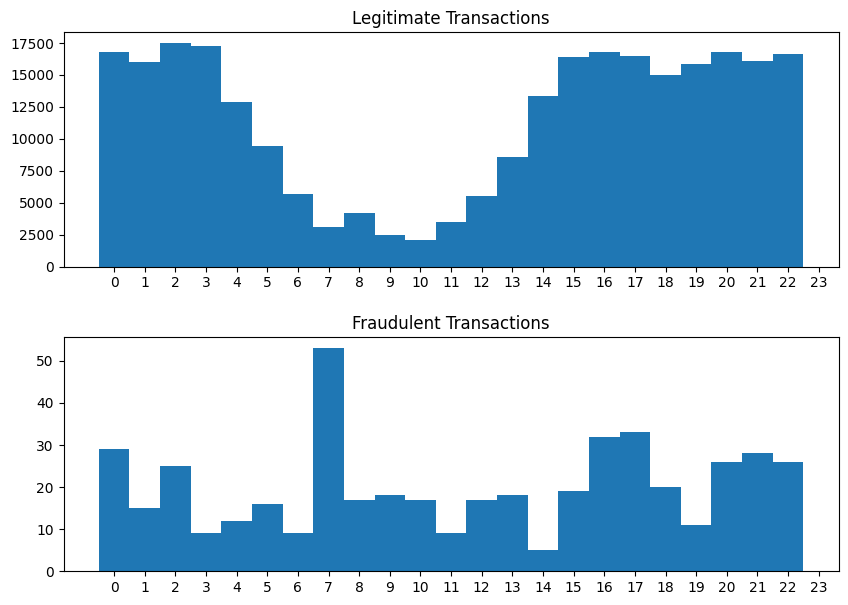

In [9]:
#basic statistics for Time suggest that this attribute is given as a timestamp (seconds). 
#We can convert it to local date and extract the hours in an attempt to identify if the hour of the transaction is correlated with the possibility of a transaction being fraudulent.
dataDF["Hour"] = dataDF["Time"].apply(datetime.fromtimestamp).dt.hour
fig, ax = plt.subplots(2, figsize=(10,7))
for a in ax:
    a.set_xticks(range(24))
dataDF.loc[dataDF["Class"] == 0]["Hour"].hist(bins=np.arange(24)-0.5, ax=ax[0], grid=False)
dataDF.loc[dataDF["Class"] == 1]["Hour"].hist(bins=np.arange(24)-0.5, ax=ax[1], grid=False)
ax[0].title.set_text("Legitimate Transactions")
ax[1].title.set_text("Fraudulent Transactions")
plt.subplots_adjust(hspace=0.3)

In [10]:
#feature engineering
# SMOTE to rectify the imbalance in our dataset 


# Split the data into training and test sets
trainDF, testDF = train_test_split(dataDF, test_size=0.2, random_state=1234, stratify=dataDF[["Class"]])

# Create a copy of the training set for normalization
trainDF_norm = trainDF.copy()

# Normalize the "Amount" and "Hour" columns in the training set
trainDF_norm["Amount"] = trainDF["Amount"].subtract(trainDF["Amount"].mean())
trainDF_norm["Hour"] = trainDF["Hour"].subtract(trainDF["Hour"].mean())

# Create a copy of the test set for normalization
testDF_norm = testDF.copy()

# Normalize the "Amount" and "Hour" columns in the test set
testDF_norm["Amount"] = testDF["Amount"].subtract(testDF["Amount"].mean())
testDF_norm["Hour"] = testDF["Hour"].subtract(testDF["Hour"].mean())

# Use the normalized DataFrames
trainDF = trainDF_norm
testDF = testDF_norm

# Calculate and print the percentage of fraudulent transactions in the training set
tr_value_counts = trainDF["Class"].value_counts()
print("Fraudulent transactions are %.2f%% of the training set." % (tr_value_counts[1] * 100 / len(trainDF)))

# Calculate and print the percentage of fraudulent transactions in the test set
tst_value_counts = testDF["Class"].value_counts()
print("Fraudulent transactions are %.2f%% of the test set." % (tst_value_counts[1] * 100 / len(testDF)))



Fraudulent transactions are 0.17% of the training set.
Fraudulent transactions are 0.17% of the test set.


In [11]:
trainDF = trainDF.drop(["Time"], axis=1)
testDF = testDF.drop(["Time"], axis=1)

In [12]:
#split your dataset into independent variables (features) and the target variable (class or label).
X_train = trainDF.iloc[:, trainDF.columns != "Class"]
y_train = trainDF.iloc[:, trainDF.columns == "Class"]
X_test = testDF.iloc[:, testDF.columns != "Class"]
y_test = testDF.iloc[:, testDF.columns == "Class"]
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Hour
135152,1.082,-0.075,1.395,1.373,-0.958,0.077,-0.625,0.205,0.861,-0.248,...,-0.012,0.204,0.063,0.399,0.298,-0.400,0.089,0.039,-76.750,-8.331
103706,1.013,0.188,1.615,2.594,-0.609,0.839,-0.683,0.400,-0.260,0.597,...,0.017,0.218,0.074,0.230,0.185,-0.046,0.059,0.027,-81.450,-12.331
231651,-0.701,0.090,1.540,-3.114,0.458,0.431,0.183,0.195,-1.230,-0.503,...,-0.069,-0.367,-0.449,-1.461,0.628,-0.475,0.004,0.027,-76.250,9.669
199939,-0.430,-0.595,0.676,-2.603,1.499,4.231,-1.079,1.239,-0.798,-0.003,...,-0.015,0.214,0.090,0.694,-0.698,0.592,0.158,0.166,-42.350,5.669
103404,1.296,1.011,-3.192,0.472,3.350,2.433,0.190,0.622,-0.557,-1.487,...,-0.263,-0.825,-0.245,0.675,1.011,-0.279,0.041,0.091,-83.260,-12.331


In [13]:
# SMOTE to rectify the imbalance in our dataset
X_train_smote, y_train_smote = SMOTE(random_state=1234).fit_resample(X_train, y_train)
smote_value_counts = y_train_smote["Class"].value_counts()
print("Fraudulent transactions are %.2f%% of the test set." % (smote_value_counts[0] * 100 / len(y_train_smote)))

Fraudulent transactions are 50.00% of the test set.


In [14]:
#XGBoost Model Training
def xgboost_search(X, y, search_verbose=1):
    params = {
    "gamma":[0.5, 1, 1.5, 2, 5],
    "max_depth":[3,4,5,6],
    "min_child_weight": [100],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "learning_rate": [0.1, 0.01, 0.001]
    }
    xgb = XGBClassifier(objective="binary:logistic", eval_metric="auc", use_label_encoder=False)

    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1234)

    grid_search = GridSearchCV(estimator=xgb, param_grid=params, scoring="roc_auc", n_jobs=1, cv=skf.split(X,y), verbose=search_verbose)

    grid_search.fit(X, y)

    print("Best estimator: ")
    print(grid_search.best_estimator_)
    print("Parameters: ", grid_search.best_params_)
    print("Highest AUC: %.2f" % grid_search.best_score_)

    return grid_search.best_params_

In [15]:
rows = random.sample(np.arange(0,len(X_train_smote.index)).tolist(), 5000)
model_params = xgboost_search(X_train_smote.iloc[rows,], y_train_smote.iloc[rows,])

Fitting 3 folds for each of 540 candidates, totalling 1620 fits
Best estimator: 
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=1.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=100, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Parameters:  {'colsample_bytree': 0.6, 'gamma': 1.5, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 100, 'subsample': 1.0}
Highest AUC: 0.99


In [16]:
model = XGBClassifier(objective="binary:logistic", eval_metric="auc", use_label_encoder=False)
model.set_params(**model_params)
model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=1.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=100, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

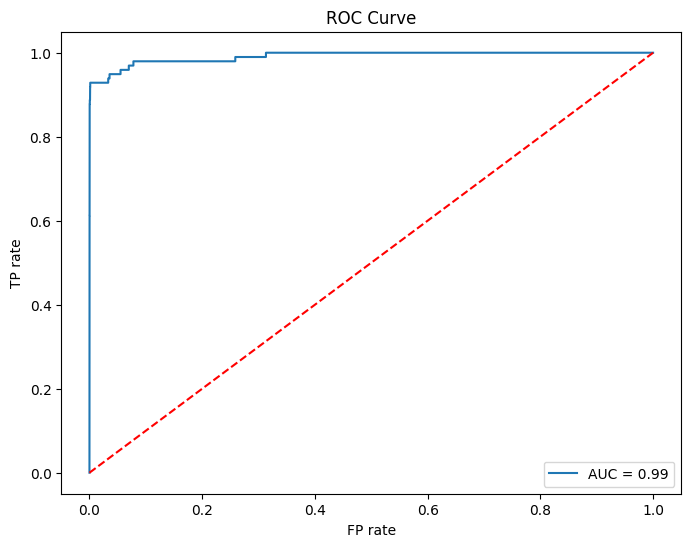

In [17]:
#use an ROC AUC curve for evaluating how well our model performs on the holdout set (X_test, y_test). 
#To generate the ROC curve we calculate the true positive (TP) and false positive (FP) rates on the holdout set at various threshold levels.
y_pred = model.predict_proba(X_test)[:,1]
fp_r, tp_r, t = metrics.roc_curve(y_test, y_pred)
auc = metrics.auc(fp_r, tp_r)
plt.figure(figsize=(8, 6))
plt.plot(fp_r, tp_r, label="AUC = %.2f" % auc)
plt.plot([0,1],[0,1],"r--")
plt.ylabel("TP rate")
plt.xlabel("FP rate")
plt.legend(loc=4)
plt.title("ROC Curve")
plt.show()

In [18]:
t_opt_idx = np.argmax(tp_r - fp_r)
t_opt = t[t_opt_idx]
print("Threshold value is: %.2f" % t_opt)

Threshold value is: 0.86


Text(0.5, 0.98, 'Impact of threshold adjustment on the error matrix')

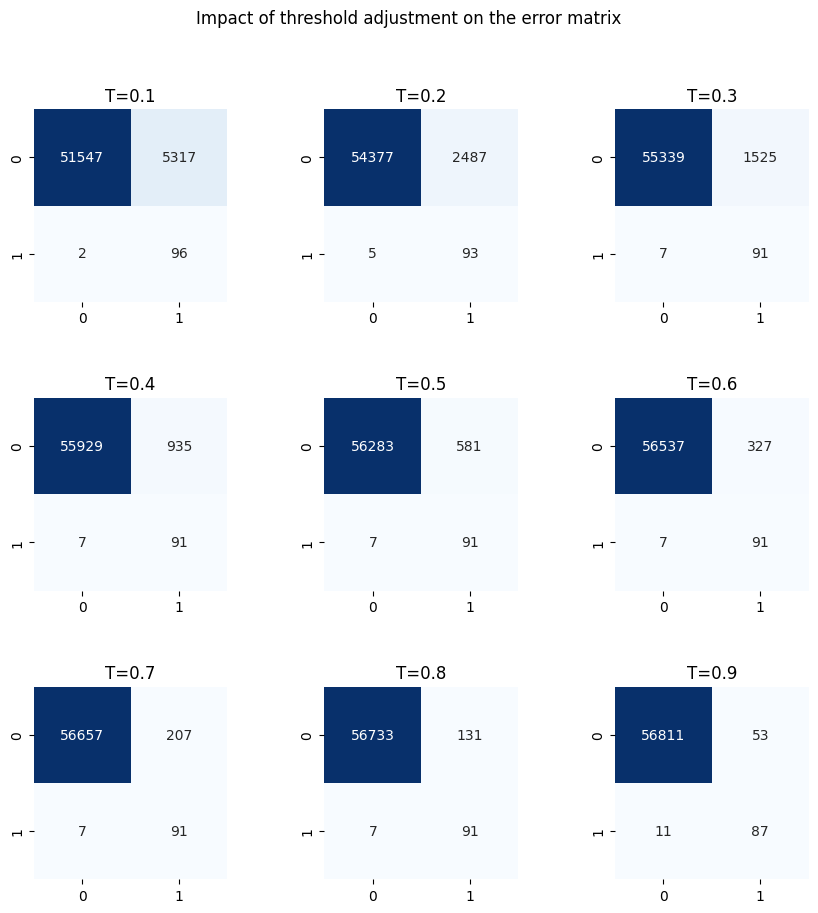

In [19]:
y_pred = model.predict_proba(X_test)[:,1]

fig, axes = plt.subplots(3,3, figsize=(10,10))

for t, ax in enumerate(axes.flat):
    threshold = (t+1)/10

    y_pred_int = (y_pred > threshold).astype(int)
    c_matrix = metrics.confusion_matrix(y_test, y_pred_int)
    sns.heatmap(c_matrix, annot=True, cmap="Blues", fmt="d", ax=ax, cbar=False)
    ax.title.set_text("T=%.1f" % threshold)

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle("Impact of threshold adjustment on the error matrix")

In [20]:
model.save_model("smote_fraud.xgb")

c:\Users\pooja\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [12:03:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [21]:
from xgboost import XGBClassifier

# Load the saved model
loaded_model = XGBClassifier()
loaded_model.load_model("smote_fraud.xgb")


In [22]:
import pandas as pd
import numpy as np

# Load the original dataset
original_dataset_path = "C:\\Users\\pooja\\OneDrive\\Desktop\\ofds_cy\\creditcard.csv"
original_data = pd.read_csv(original_dataset_path)

# Create a dummy dataset with different values
dummy_data = pd.DataFrame()
for column in original_data.columns:
    if column == 'Class':
        dummy_data[column] = np.zeros(len(original_data))
    else:
        # Add noise to the original values to create differences
        noise = np.random.normal(0, 0.1, len(original_data))
        dummy_data[column] = original_data[column] + noise

# Save the dummy dataset
dummy_dataset_path = "C:\\Users\\pooja\\OneDrive\\Desktop\\ofds_cy\\DummyDataset.csv"
dummy_data.to_csv(dummy_dataset_path, index=False)


In [23]:
print(dummy_data.head())


    Time     V1     V2    V3     V4     V5    V6    V7     V8     V9  ...  \
0 -0.043 -1.314 -0.064 2.403  1.490 -0.187 0.445 0.245  0.152  0.454  ...   
1  0.073  1.159  0.168 0.148  0.585 -0.061 0.014 0.093 -0.069 -0.302  ...   
2  1.042 -1.384 -1.311 1.639  0.458 -0.556 1.772 0.617  0.074 -1.600  ...   
3  0.979 -0.997 -0.293 1.705 -0.835 -0.026 1.172 0.327  0.392 -1.438  ...   
4  1.890 -1.242  0.705 1.568  0.543 -0.395 0.230 0.499 -0.403  0.985  ...   

     V21    V22    V23    V24    V25    V26    V27    V28  Amount  Class  
0 -0.241  0.315 -0.111 -0.002  0.108 -0.330 -0.105 -0.189 149.503  0.000  
1 -0.105 -0.716  0.277 -0.408  0.142  0.067  0.254 -0.123   2.801  0.000  
2  0.256  0.672  0.807 -0.698 -0.483 -0.161  0.007 -0.161 378.716  0.000  
3 -0.222 -0.004 -0.267 -1.294  0.843 -0.170  0.181  0.238 123.601  0.000  
4  0.178  0.754 -0.227  0.041 -0.234  0.413  0.356  0.069  70.163  0.000  

[5 rows x 31 columns]


In [24]:
# Assuming X_new contains the features of new transactions
X_new = dummy_data.drop("Class", axis=1)

# This will give you the probability of each transaction being fraudulent
probabilities = loaded_model.predict_proba(X_new)[:, 1]

# Print the predicted probabilities
print(probabilities)



[0.42353076 0.01024239 0.07397703 ... 0.0014575  0.18164368 0.00477833]


In [25]:
# Define a threshold (you can adjust this based on your requirements)
threshold = 0.5

# Classify transactions based on the threshold
classified_transactions = (probabilities > threshold).astype(int)

# Print the first 5 entries for fraudulent transactions
print("Fraudulent Transactions:")
print(X_new[classified_transactions == 1].head())

# Print the first 5 entries for legitimate transactions
print("\nLegitimate Transactions:")
print(X_new[classified_transactions == 0].head())


Fraudulent Transactions:
           Time     V1     V2    V3     V4     V5     V6     V7     V8     V9  \
768     579.159 -1.296 -0.464 2.546 -0.225 -0.312 -0.521 -0.240  0.370 -1.173   
1047    792.066 -2.586  1.015 3.908 -0.212  0.026  0.551  1.752 -2.199  4.415   
1079    824.171 -0.983 -0.144 2.271  0.605 -1.121  0.231  0.208 -0.175 -0.953   
1550   1216.981  0.838 -0.580 2.215  3.282 -1.788  0.683 -1.269  0.431  1.178   
14328 25410.010 -1.914 -0.537 2.754 -1.413 -0.656  0.748 -0.892 -0.633  0.348   

       ...    V20    V21    V22    V23   V24   V25    V26    V27    V28  \
768    ... -0.292 -0.011  0.030 -0.006 0.319 0.306 -0.403  0.272  0.245   
1047   ...  0.900 -0.456 -0.017 -0.565 0.675 0.014  0.079 -2.798 -1.590   
1079   ... -0.068 -0.199 -0.088 -0.127 0.367 0.131 -0.087  0.121 -0.322   
1550   ... -0.027  0.191  0.369 -0.157 0.595 0.414  0.293  0.095 -0.003   
14328  ... -1.098  0.406 -0.341  0.054 0.036 0.122  0.388 -0.266  0.115   

       Amount  
768    79.991  
1047 

In [26]:
# Define a threshold (you can adjust this based on your requirements)
threshold = 0.5

# Classify transactions based on the threshold
classified_transactions = (probabilities > threshold).astype(int)

# Create a DataFrame with selected columns for the first 10 entries
result_df = pd.DataFrame({
    'Time': X_new['Time'].head(10),
    'Amount': X_new['Amount'].head(10),
    'Probability': probabilities[:10],
    'Fraud/Legitimate': ['Fraudulent' if fraud == 1 else 'Legitimate' for fraud in classified_transactions[:10]]

})

# Print the DataFrame
print(result_df)

    Time  Amount  Probability Fraud/Legitimate
0 -0.043 149.503        0.424       Legitimate
1  0.073   2.801        0.010       Legitimate
2  1.042 378.716        0.074       Legitimate
3  0.979 123.601        0.030       Legitimate
4  1.890  70.163        0.010       Legitimate
5  2.154   3.666        0.007       Legitimate
6  3.988   4.976        0.033       Legitimate
7  7.012  40.785        0.002       Legitimate
8  6.963  93.214        0.002       Legitimate
9  9.065   3.638        0.001       Legitimate


In [27]:
# Assuming X_new contains the features of new transactions
X_new = dummy_data.drop("Class", axis=1)

# This will give you the probability of each transaction being fraudulent
probabilities = loaded_model.predict_proba(X_new)[:, 1]

# Define a threshold (you can adjust this based on your requirements)
threshold = 0.5

# Classify transactions based on the threshold
classified_transactions = (probabilities > threshold).astype(int)

# Create a DataFrame with selected columns
result_df = pd.DataFrame({
    'Time': X_new['Time'],
    'Amount': X_new['Amount'],
    'Probability': probabilities,
    'Type': ['Fraudulent' if fraud == 1 else 'Legitimate' for fraud in classified_transactions]
})

# Display first 10 fraudulent transactions
fraudulent_df = result_df[result_df['Type'] == 'Fraudulent'].head(5)
print("Fraudulent Transactions:")
print(fraudulent_df[['Time', 'Amount', 'Probability', 'Type']])

# Display first 10 legitimate transactions
legitimate_df = result_df[result_df['Type'] == 'Legitimate'].head(5)
print("\nLegitimate Transactions:")
print(legitimate_df[['Time', 'Amount', 'Probability', 'Type']])

Fraudulent Transactions:
           Time  Amount  Probability        Type
768     579.159  79.991        0.587  Fraudulent
1047    792.066   3.474        0.582  Fraudulent
1079    824.171 143.999        0.792  Fraudulent
1550   1216.981  75.755        0.540  Fraudulent
14328 25410.010  39.501        0.614  Fraudulent

Legitimate Transactions:
    Time  Amount  Probability        Type
0 -0.043 149.503        0.424  Legitimate
1  0.073   2.801        0.010  Legitimate
2  1.042 378.716        0.074  Legitimate
3  0.979 123.601        0.030  Legitimate
4  1.890  70.163        0.010  Legitimate


In [30]:
import pandas as pd
import numpy as np
import time
from xgboost import XGBClassifier

# Load the saved model
loaded_model = XGBClassifier()
loaded_model.load_model("smote_fraud.xgb")

# Load the dummy dataset
dummy_dataset_path = r"C:\Users\pooja\OneDrive\Desktop\ofds_cy\DummyDataset.csv"
dummy_data = pd.read_csv(dummy_dataset_path)

# Set the batch size (adjust as needed)
batch_size = 1

def generate_new_transactions():
    # Shuffle the existing dataset
    shuffled_data = dummy_data.sample(frac=1).reset_index(drop=True)

    # Sample new transactions from the shuffled dataset
    new_transactions = shuffled_data.head(batch_size).copy()

    # Update the Time column to simulate new transactions
    new_transactions['Time'] = pd.to_datetime('now')  # Use current timestamp

    return new_transactions

# Simulate continuous monitoring
for _ in range(5):  # Simulate 5 rounds
    # Simulate a batch of new transactions
    new_batch = generate_new_transactions()

    # Display the new batch
    print("New Batch of Transactions:")
    print(new_batch[['Time', 'Amount']])

    # Predict fraud probabilities for the new batch
    fraud_probabilities = loaded_model.predict_proba(new_batch.drop(columns=['Time']))[:, 1]

    # Define a threshold
    threshold = 0.5

    # Classify transactions based on the threshold
    classified_transactions = (fraud_probabilities < threshold).astype(int)

    # Create a DataFrame with selected columns
    result_df = pd.DataFrame({
        'Time': new_batch['Time'],
        'Amount': new_batch['Amount'],
        'Probability': fraud_probabilities,
        'Transaction-Type': ['Fraudulent' if fraud == 1 else 'Legitimate' for fraud in classified_transactions]
    })

    # Display the first transaction based on classification
    first_transaction_df = result_df.head(1)
    print("\nFirst Classified Transaction:")
    print(first_transaction_df[['Time', 'Amount', 'Probability', 'Transaction-Type']])

    # Simulate a new batch every 5 seconds
    time.sleep(5)  


New Batch of Transactions:
                        Time  Amount
0 2024-01-23 13:54:01.450741 173.718

First Classified Transaction:
                        Time  Amount  Probability Transaction-Type
0 2024-01-23 13:54:01.450741 173.718        0.010       Fraudulent
New Batch of Transactions:
                        Time  Amount
0 2024-01-23 13:54:06.604249  13.948

First Classified Transaction:
                        Time  Amount  Probability Transaction-Type
0 2024-01-23 13:54:06.604249  13.948        0.005       Fraudulent
New Batch of Transactions:
                        Time  Amount
0 2024-01-23 13:54:11.765471   0.847

First Classified Transaction:
                        Time  Amount  Probability Transaction-Type
0 2024-01-23 13:54:11.765471   0.847        0.024       Fraudulent
New Batch of Transactions:
                        Time  Amount
0 2024-01-23 13:54:16.919096   7.975

First Classified Transaction:
                        Time  Amount  Probability Transaction-Type
0 2

In [33]:
import pandas as pd
import numpy as np
import time
from xgboost import XGBClassifier

# Load the saved model
loaded_model = XGBClassifier()
loaded_model.load_model("smote_fraud.xgb")

# Load the dummy dataset
dummy_dataset_path = r"C:\Users\pooja\OneDrive\Desktop\ofds_cy\DummyDataset.csv"
dummy_data = pd.read_csv(dummy_dataset_path)

# Setting the batch size
batch_size = 1

def generate_new_transactions():
    # Shuffle the existing dataset
    shuffled_data = dummy_data.sample(frac=1).reset_index(drop=True)

    # Sample new transactions from the shuffled dataset
    new_transactions = shuffled_data.head(batch_size).copy()

    # Update the Time column to simulate new transactions,by using the current timestamp
    new_transactions['Time'] = pd.to_datetime('now')  

    return new_transactions

# Simulate continuous monitoring
for _ in range(5):  # Simulate 5 rounds
    # Simulate a batch of new transactions
    new_batch = generate_new_transactions()

    # Display the new batch
    print("New Batch of Transactions:")
    print(new_batch[['Time', 'Amount']])

    # Predict fraud probabilities for the new batch
    fraud_probabilities = loaded_model.predict_proba(new_batch.drop(columns=['Time']))[:, 1]

    # Define a threshold
    threshold = 0.5

    # Classify transactions based on the threshold
    classified_transactions = (fraud_probabilities > threshold).astype(int)

    # Create a DataFrame with selected columns
    result_df = pd.DataFrame({
        'Time': new_batch['Time'],
        'Amount': new_batch['Amount'],
        'Probability': fraud_probabilities,
        'Transaction-Type': ['Fraudulent' if fraud == 1 else 'Legitimate' for fraud in classified_transactions]
    })

    # Display the first transaction based on classification
    first_transaction_df = result_df.head(1)

    # Check if the transaction is classified as fraudulent
    if classified_transactions[0] == 1:
        print("\nAlert: Potentially Fraudulent Transaction Detected!")
        #print(first_transaction_df[['Time', 'Amount', 'Probability', 'Transaction-Type']])
    else:
        print("\nLegitimate Transaction Detected.")
        print(first_transaction_df[['Time', 'Amount', 'Probability', 'Transaction-Type']])

    # Simulate a new batch every 5 seconds
    time.sleep(5)  


New Batch of Transactions:
                        Time  Amount
0 2024-01-23 14:07:03.158784 175.948

Legitimate Transaction Detected.
                        Time  Amount  Probability Transaction-Type
0 2024-01-23 14:07:03.158784 175.948        0.018       Legitimate
New Batch of Transactions:
                        Time  Amount
0 2024-01-23 14:07:08.297392  49.998

Legitimate Transaction Detected.
                        Time  Amount  Probability Transaction-Type
0 2024-01-23 14:07:08.297392  49.998        0.012       Legitimate
New Batch of Transactions:
                        Time  Amount
0 2024-01-23 14:07:13.507208  46.069

Legitimate Transaction Detected.
                        Time  Amount  Probability Transaction-Type
0 2024-01-23 14:07:13.507208  46.069        0.008       Legitimate
New Batch of Transactions:
                        Time  Amount
0 2024-01-23 14:07:18.657094   4.974

Legitimate Transaction Detected.
                        Time  Amount  Probability Transact

In [10]:
%cd C:\Users\pooja\OneDrive\Desktop\ofds_cy
!git init
!git add d_processing.ipynb
!git commit -m "Initial commit with Jupyter Notebook"
!git remote add origin https://github.com/varsh06pm/Online-Fraud-Detection-System.git
!git push -u origin master

C:\Users\pooja\OneDrive\Desktop\ofds_cy


C:\Users\pooja\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Initialized empty Git repository in C:/Users/pooja/OneDrive/Desktop/ofds_cy/.git/


Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'pooja@Pooja_Muthalik.(none)')
error: src refspec master does not match any
error: failed to push some refs to 'https://github.com/varsh06pm/Online-Fraud-Detection-System.git'


In [11]:
!git config --global user.email "varsha.pm123@gmail.com"
!git config --global user.name "varsh06pm"

In [13]:
%cd C:\Users\pooja\OneDrive\Desktop\ofds_cy
!git init
!git add d_processing.ipynb
!git commit -m "Initial commit with Jupyter Notebook"
!git remote add origin https://github.com/varsh06pm/Online-Fraud-Detection-System.git
!git push -u origin main

C:\Users\pooja\OneDrive\Desktop\ofds_cy


C:\Users\pooja\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Reinitialized existing Git repository in C:/Users/pooja/OneDrive/Desktop/ofds_cy/.git/
On branch master
Your branch is up to date with 'origin/master'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	DummyDataset.csv
	Untitled-1.py
	creditcard.csv
	smote_fraud.xgb
	try1.py

nothing added to commit but untracked files present (use "git add" to track)


error: remote origin already exists.
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/varsh06pm/Online-Fraud-Detection-System.git'
